In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


sns.set_theme(style="whitegrid")


In [2]:
dataset_file_name = 'diamonds.csv'


## 1) Importação de dados

In [3]:
df = pd.read_csv(dataset_file_name)
df.columns


Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [4]:
df = df.drop(columns=['Unnamed: 0'])


## 2) Descritiva

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


### Boxplot dos preços

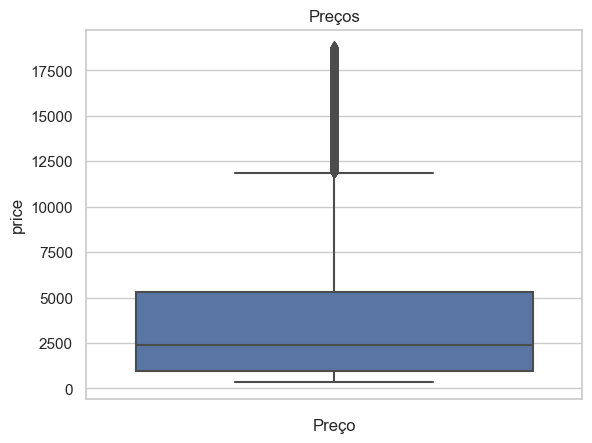

In [6]:
sns.boxplot(data=df, y='price')
plt.title('Preços')
plt.xlabel('Preço')
plt.show()


### Scatterplot quilates

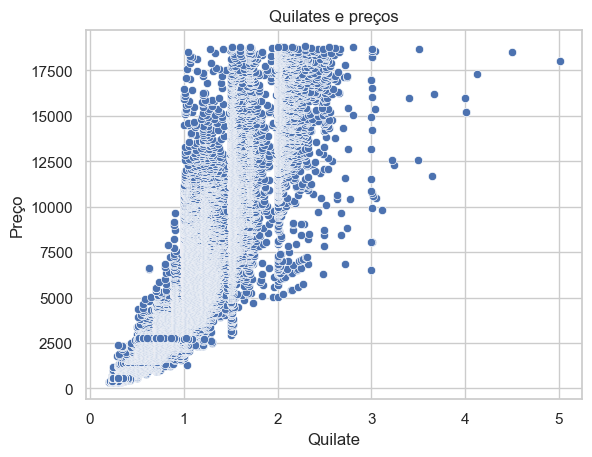

In [7]:
sns.scatterplot(data=df, x='carat', y='price')
plt.title("Quilates e preços")
plt.xlabel("Quilate")
plt.ylabel("Preço")
plt.show()


### Boxplot, cores de diamantes e preços

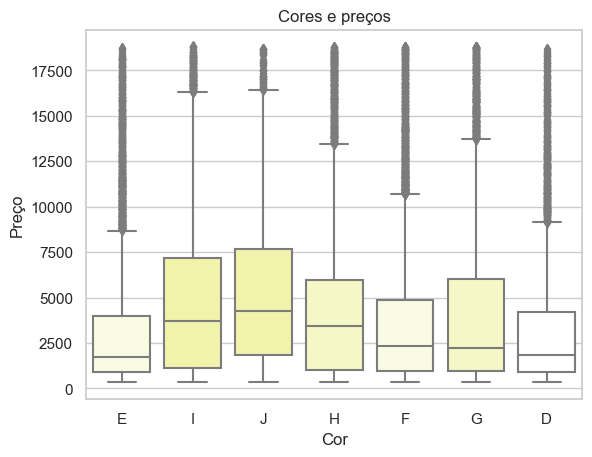

In [8]:
# Mapeando cores respectivas a suas letras
colors_map = {'D': '#FFFFFF', 'E': '#FEFFDF', 'F': '#FEFFDF',
              'G': '#FEFFBF', 'H': '#FEFFBF', 'I': '#FEFF9F', 'J': '#FEFF9F'}

sns.boxplot(data=df, x='color', y='price', palette=colors_map)
plt.title("Cores e preços")
plt.xlabel("Cor")
plt.ylabel('Preço')
plt.show()


## 3) Correlações

In [9]:
correlations = df.corr(numeric_only=True)


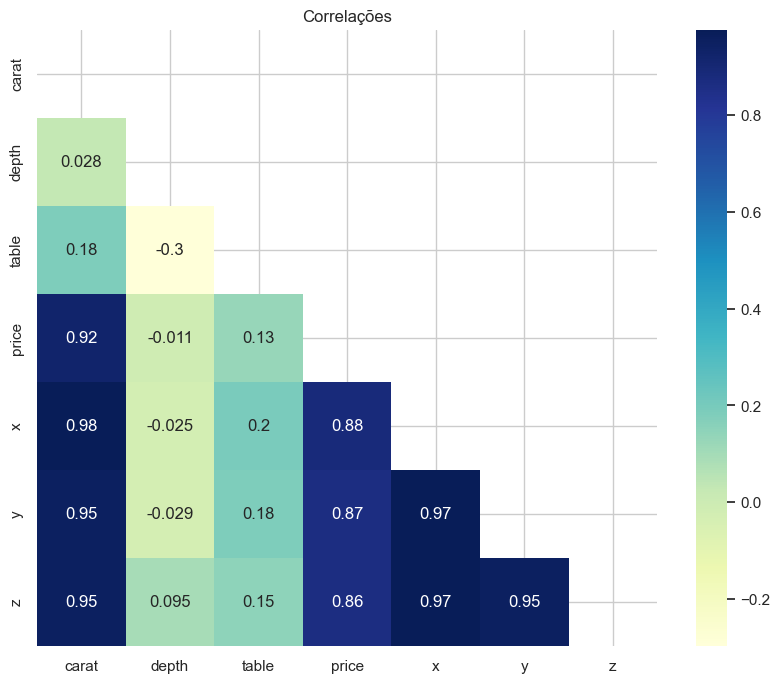

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(correlations, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlations, annot=True, ax=ax, cmap='YlGnBu', mask=mask)
plt.title("Correlações")
plt.show()


## 4) Feature engineering

In [11]:
def missing_percentage(df: pd.DataFrame) -> pd.DataFrame:
    """Calcula a porcentagem de valores nulos em cada coluna de um DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame.

    Returns
    -------
    pandas.DataFrame
        A DataFrame with two columns: "Total" and "Percent".
        The "Total" column shows the total number of missing values in each column of the input DataFrame,
        in descending order, while the "Percent" column shows the percentage of missing values relative to
        the total size of the DataFrame, also in descending order.
    """

    # Calcula o número total de valores nulos em cada coluna do DataFrame de entrada
    # Contagem dos valores nulos em cada coluna
    total = df.isnull().sum()
    # Ordena do maior para o menor número de valores nulos
    total = total.sort_values(ascending=False)
    # Remove as colunas sem valores nulos
    total = total[total != 0]

    # Calcula a porcentagem de valores nulos em relação ao tamanho total do DataFrame de entrada
    # Calcula a porcentagem de valores nulos em cada coluna
    percent = (total / len(df)) * 100
    # Arredonda para duas casas decimais
    percent = percent.round(2)
    # Remove as colunas sem valores nulos
    percent = percent[percent != 0]

    result = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    return result


In [12]:
missing_percentage(df)  # 0%


,Total,Percent


In [13]:
df.dtypes


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [14]:
df['area'] = df.x * df.y * df.z
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,area
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


## 5) Modelagem

### Treinando com 20% do dataset

In [15]:
X = df[['carat', 'depth', 'table', 'area']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.2, random_state=95347)


In [16]:
reg = LinearRegression()


In [17]:
reg.fit(X_train, y_train)


LinearRegression()

## 6) Métricas

In [18]:
accuracy = reg.score(X_test, y_test)
accuracy


0.851916729751519

In [19]:
reg.intercept_


12972.336837552928

In [20]:
reg.coef_


array([6346.89709343, -147.9079624 , -106.77874659,    8.98460952])

### Precisão de 85.19%

In [21]:
print(f"Precisão de {round(accuracy*100, 2)}%")


Precisão de 85.19%


In [22]:
y_pred = reg.predict(X=X_test)


In [23]:
print('%.2f' % mean_squared_error(y_test, y_pred))


2356847.21


In [24]:
print('%.2f' % mean_absolute_error(y_test, y_pred))


989.59


In [25]:
y_train.mean()


3992.685947348906

In [26]:
y_pred.mean()


3920.5657019865